# ARIMA Model

In [6]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from math import sqrt
from pmdarima import auto_arima
from pandas.plotting import lag_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error ,r2_score 
from statsmodels.tools.eval_measures import rmse

# Load and PreProcess 

In [124]:
data = pd.read_csv('data/PMS_data.csv',nrows=500)

In [125]:
data.head()

,Flow,Occupy,Speed
0,133.0,0.0603,65.8
1,210.0,0.0589,69.6
2,124.0,0.0358,65.8
3,145.0,0.0416,69.6
4,206.0,0.0493,69.4


In [126]:
ratio = 0.75
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
train_set = data[0:train_size]
test_set = data[train_size:]

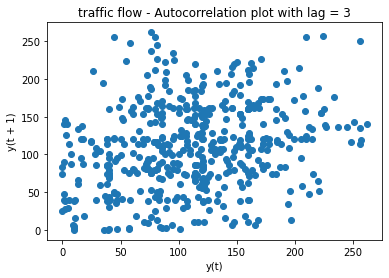

In [127]:
plt.figure()
lag_plot(data['Flow'], lag=1)
plt.title('traffic flow - Autocorrelation plot with lag = 3')
plt.savefig("Corrolation.png")
plt.show()

In [128]:
print(len(train_set))
print(len(test_set))

375
125


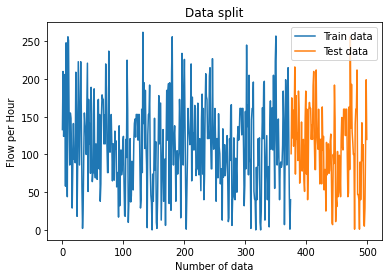

In [129]:
plt.plot(train_set['Flow'].index,train_set['Flow'].values,label="Train data")
plt.plot(test_set['Flow'].index, test_set['Flow'].values,label="Test data")
plt.title('Data split')
plt.xlabel('Number of data')
plt.ylabel('Flow per Hour')
plt.legend()
plt.savefig("traintestdata.png")

# Train ARIMA 

In [130]:
xtrain = train_set['Flow'].values
xtest = test_set['Flow'].values

In [131]:
data_set = data['Flow']
data_set.head()

0    133.0
1    210.0
2    124.0
3    145.0
4    206.0
Name: Flow, dtype: float64

In [132]:
aut_model = auto_arima(xtrain, start_p=1, start_q=1,test='adf',max_p=5, max_q=5,m=1,d=1,seasonal=False,   start_P=0, D=None, trace=True ,error_action='ignore',  suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4256.195, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4217.749, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4110.408, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4254.200, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4108.794, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4215.762, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.964 seconds


In [133]:

history = xtrain.tolist()
predictions = list()
for t in range(len(xtest)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = xtest[t]
    history.append(obs)



In [134]:
rmse = sqrt(mean_squared_error(xtest, predictions))
rmse

52.977878194276066

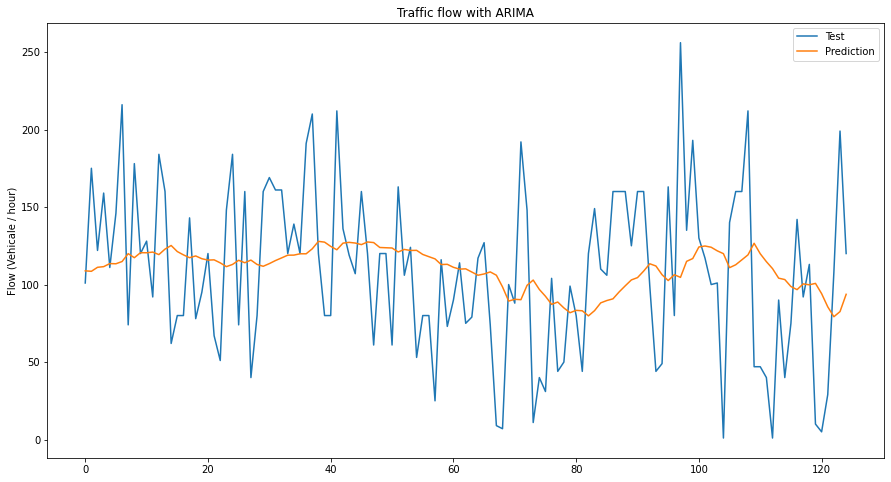

In [136]:
plt.figure(figsize=(15,8))
plt.plot(xtest,label = "Test")
plt.plot(predictions, label = "Prediction")
plt.ylabel("Flow (Vehicale / hour)")
plt.title('Traffic flow with ARIMA')
plt.legend()
#plt.savefig('Actual_real.png')
plt.show()

In [137]:
r2 = r2_score(xtest, predictions)
rmse = sqrt(mean_squared_error(xtest, predictions))
print('RMSE', rmse, 'R_2', r2)

RMSE 52.977878194276066 R_2 -0.006281040558703266


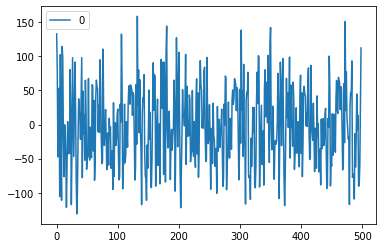

In [138]:
residuals = DataFrame(model_fit.resid) 
residuals.plot()
plt.show()

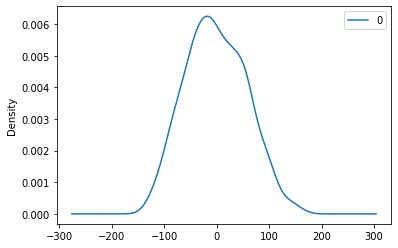

In [139]:
#we continue to check residuals
residuals.plot(kind='kde') 
plt.show()